## 프로젝트 소개

Offie라는 TV 프로그램이 시간에 따라 인기도와 품질이 어떻게 변했는지 알아본다.  

데이터셋은 https://www.kaggle.com/foolofatook/plotly-the-office-fun-from-home 에서 다운로드 받을 수 있다.  

데이터셋에 대한 정보는 다음과 같다.  
- episode_number: Canonical episode number.  

- season: Season in which the episode appeared.  

- episode_title: Title of the episode.  

- description: Description of the episode.  

- ratings: Average IMDB rating.  

- votes: Number of votes.  

- viewership_mil: Number of US viewers in millions.  

- duration: Duration in number of minutes.  

- release_date: Airdate.  

- guest_stars: Guest stars in the episode (if any).  

- director: Director of the episode.  

- writers: Writers of the episode.  

- has_guests: True/False column for whether the episode contained guest stars.  

- scaled_ratings: The ratings scaled from 0 (worst-reviewed) to 1 (best-reviewed).  


## Data pre-processing

In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('the_office_series.csv')
data.head()

,Unnamed: 0,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


- 데이터를 살펴보면 첫번째 열의 이름이 Unnamed: 0 으로 잘못 표기되어 있다 -> episode_number 으로 수정
- has_guests, scaled_ratings 열이 정의되어 있지 않다

In [3]:
# change the first column name
data = data.rename(columns={'Unnamed: 0':'episode_number'})
data.head()

,episode_number,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels


In [48]:
# define scaled_ratings, has_guests
data['scaled_ratings'] = data.Ratings/10
data['has_guests'] = np.logical_not(pd.isna(data['GuestStars'])) 

data.head()

,episode_number,Season,EpisodeTitle,About,Ratings,Votes,Viewership,Duration,Date,GuestStars,Director,Writers,scaled_ratings,has_guests
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,24 March 2005,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,0.75,False
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,29 March 2005,NaN,Ken Kwapis,B. J. Novak,0.83,False
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,5 April 2005,NaN,Ken Whittingham,Paul Lieberstein,0.78,False
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,12 April 2005,NaN,Bryan Gordon,Michael Schur,0.81,False
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,19 April 2005,NaN,Greg Daniels,Greg Daniels,0.84,False


## Visualization

In [87]:
# visualization settings - colors
colors = []
for rating in data.scaled_ratings:
    if rating < 0.70:
        colors.append("red")
    elif (rating >= 0.70 and rating < 0.80):
        colors.append('orange')
    elif (rating >= 0.8 and rating < 0.9):
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')

In [88]:
# sizes
sizes = []
for boolguest in data.has_guests:
    if boolguest == True:
        sizes.append(250)
    else:
        sizes.append(25)

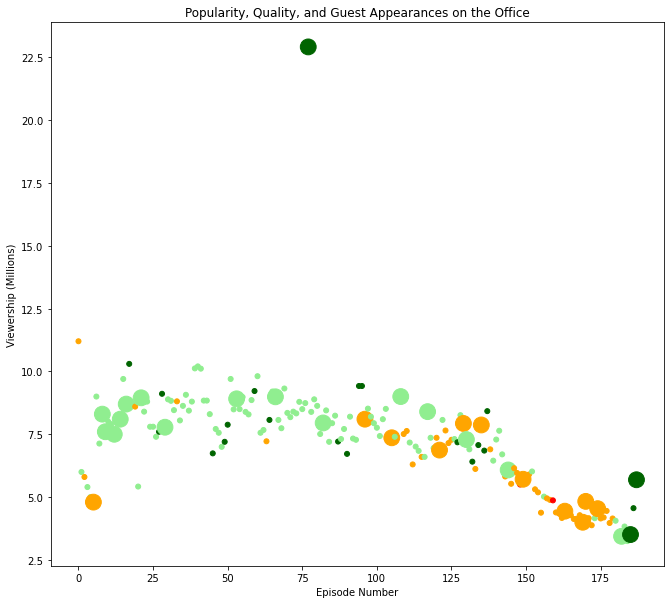

In [89]:
# Draw a scatter plot
fig = plt.figure() # initialize figure
plt.scatter(data.episode_number, data.Viewership, s = sizes, c = colors)
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.rcParams['figure.figsize'] = [11, 10] # figure size setting

## Data manipulation
- 이번에는 가장 많이 조회된 에피소드에 등장한 게스트를 찾아보자 (top_star)

In [90]:
top_star = data[data.Viewership==max(data.Viewership)]["GuestStars"]
print(top_star)

77    Cloris Leachman, Jack Black, Jessica Alba
Name: GuestStars, dtype: object
